# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [75]:
import pandas as pd


In [76]:
##Lectura de cuáles y cuántos archivos hay
for n in range (1995,2018):
    nombrearchivo= 'Precio_Bolsa_Nacional_($kWh)_' + str(n) + 'xls'
    print(nombrearchivo)

Precio_Bolsa_Nacional_($kWh)_1995xls
Precio_Bolsa_Nacional_($kWh)_1996xls
Precio_Bolsa_Nacional_($kWh)_1997xls
Precio_Bolsa_Nacional_($kWh)_1998xls
Precio_Bolsa_Nacional_($kWh)_1999xls
Precio_Bolsa_Nacional_($kWh)_2000xls
Precio_Bolsa_Nacional_($kWh)_2001xls
Precio_Bolsa_Nacional_($kWh)_2002xls
Precio_Bolsa_Nacional_($kWh)_2003xls
Precio_Bolsa_Nacional_($kWh)_2004xls
Precio_Bolsa_Nacional_($kWh)_2005xls
Precio_Bolsa_Nacional_($kWh)_2006xls
Precio_Bolsa_Nacional_($kWh)_2007xls
Precio_Bolsa_Nacional_($kWh)_2008xls
Precio_Bolsa_Nacional_($kWh)_2009xls
Precio_Bolsa_Nacional_($kWh)_2010xls
Precio_Bolsa_Nacional_($kWh)_2011xls
Precio_Bolsa_Nacional_($kWh)_2012xls
Precio_Bolsa_Nacional_($kWh)_2013xls
Precio_Bolsa_Nacional_($kWh)_2014xls
Precio_Bolsa_Nacional_($kWh)_2015xls
Precio_Bolsa_Nacional_($kWh)_2016xls
Precio_Bolsa_Nacional_($kWh)_2017xls


In [77]:
##Extrae los datos de los archivos desde 1995-2017 y se hace un DataFrame, llamado z
x=[]                                               #Crea una lista vacia
for n in  range (1995, 2018):                      # Ciclo para leer archivos desde el año 95 hasta 2017
    if n < 2000:                                   # En cada archivo, comienza la información a listarse desde una columna diferente 
        skip = 3                                   # Hasta el 99', hay que saltarse 3 filas para que salgan los datos organizados
    else:
        skip = 2                                   # Del 2000 en adelante, sólo dos columnas
            
    nombrearchivo = 'Precio_Bolsa_Nacional_($kwh)_' + str(n)  # Asigno de nombre del archivo sin decir el año
    if n>= 2016:                                   #Cada archivo tiene una extensión diferente, hasta el 2016
        nombrearchivo += '.xls'
    else: 
        nombrearchivo += '.xlsx'
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols = 24)    # Se leen los datos de cada archivo, de acuerdo a la instrucción: nombre, desde qué columna y hasta que fila 
    x.append(y)
z= pd.concat(x)                                    # Concatenar las listas de x, es decir, todos los archivos en uno sólo

index=list(range(0,len(z)))                        # crea y numera la lista de acuerdo a la cantidad de datos en z
z.index=index
print(z.head())                                    # Imprime encabezado
print(z.tail())                                    # Imprime últumos valores


        Fecha      0      1      2      3      4      5      6      7      8  \
0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       14     15     16     17      18      19      20     21     22  \
0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      23  
0  1.073  
1  1.000  
2  1.073  
3  1.0

**2.--** Compute e imprima el número de registros con datos faltantes.

In [78]:
len(z)-len(z.dropna())

28

In [79]:
len(z)

7962

**3.--** Compute e imprima el número de registros duplicados.

In [80]:
l=z[z.duplicated()]
len(l)

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [81]:
print (len(z))
b= z.dropna()            #Eliminar datos faltantes
print (len(b))
c= b.drop_duplicates()   # Eliminar datos duplicados
print(len(c))
z=c                       #Sobreescribe z
print(len(z))

7962
7934
7875
7875


**5.--** Compute y grafique el precio promedio diario.

In [82]:
import matplotlib.pyplot as plt             # Importar librerias para graficar
import matplotlib as mpl
import numpy as np
%matplotlib inline

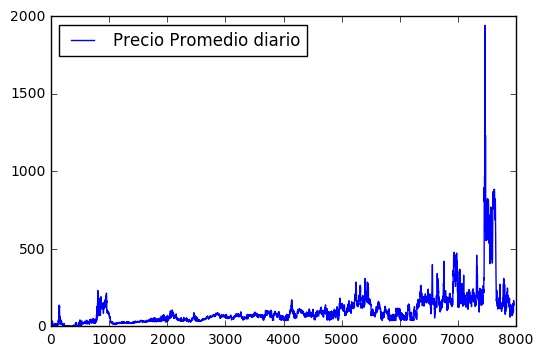

In [83]:
promdia=z.mean(axis=1)                # Calcula la media de cada día (por filas)

plt.plot(promdia)                      #Grafica los datos de la lista promdia
plt.legend(['Precio Promedio diario'], loc='upper left')
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [84]:
from datetime import datetime

C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

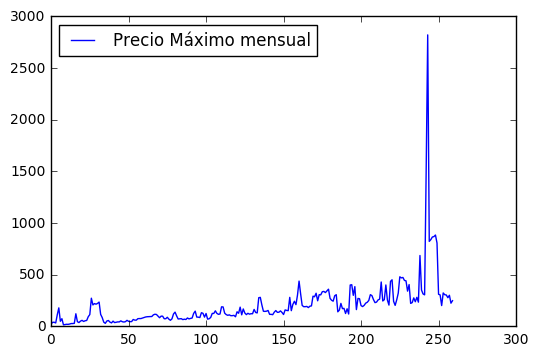

In [85]:
#Organizar información
datefecha=[]                                 # Se crea una lista vacia

datefecha= pd.to_datetime(z['Fecha'])        # Cambia el tipo de formato de la columna fecha, de string a date
z['afecha'] = datefecha                      # Agrega una nueva columna donde está el formtao de la fecha

anomes=[]                                  #Lista para guardar el mes y el año
for n in range(len(z['afecha'])):
    anomes.append(str(z.iloc[n,25])[0:7])     # A la lista anomes, se le asignan los valores de año y mes

##Cálculo de valor máximo:
maxdia=z.max(axis=1)                        #Halla el precio máximo diario
z['maximus'] = maxdia                      # Agrega una nueva columna donde está el maximo diario

z['Anomes'] = anomes                         #Nueva columna de z, para guardar el precio máximo de año mes

maxmes= z.groupby('Anomes')['maximus'].max()       #Agrupa mediante la columna Anomes, los valores del precio. 
                                                  #Luego, selecciona de cada grupo, el valor máximo de la columna maximus

index=list(range(0,len(maxmes)))                # Numera la lista de acuerdo a la cantidad de datos en maxmes
maxmes.index=index


plt.plot(maxmes)                      #Grafica los datos de la lista maxmes
plt.legend(['Precio Máximo mensual'], loc='upper left')
plt.show()


**7.--** Compute y grafique el precio mínimo mensual.

C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


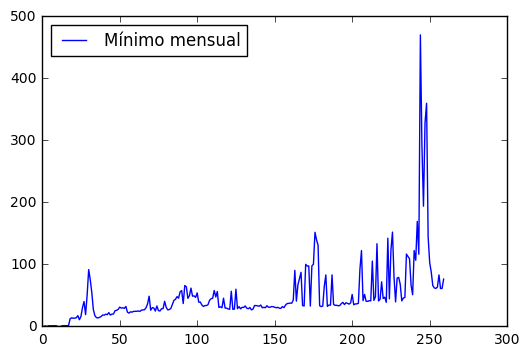

In [86]:
mindia=z.min(axis=1)                        #Halla el precio mínimo diario
z['minimus'] = mindia                      # Agrega una nueva columna donde está el mínimo diario

minmes= z.groupby('Anomes')['minimus'].min()       #Agrupa mediante la columna Anomes, los valores del precio mínimo. 
                                                 #Luego, selecciona por mes, el valor mínimo 

index=list(range(0,len(minmes)))                # Numera la lista de acuerdo a la cantidad de datos en min
minmes.index=index

plt.plot(minmes)                      #Grafica los datos de la lista minmes
plt.legend(['Mínimo mensual'], loc='upper left')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


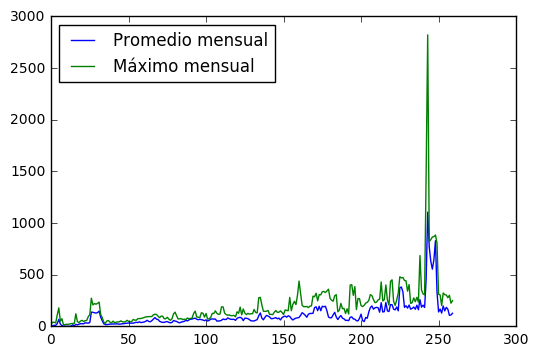

In [87]:
lista_columnas = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

promdia= z[lista_columnas].mean(axis=1)                        #Halla el precio máximo diario
z['promedius'] = promdia                      # Agrega una nueva columna donde está el maximo diario

prommes= z.groupby('Anomes')['promedius'].mean()       #Agrupa mediante la columna Anomes, los valores del precio. 
                                                  #Luego, selecciona de cada grupo, el valor máximo de la columna maximus
index=list(range(0,len(prommes)))                # Numera la lista de acuerdo a la cantidad de datos en maxmes
prommes.index=index


plt.plot(prommes)                      #Grafica los datos de la lista maxmes
plt.plot(maxmes)
plt.legend(['Promedio mensual', 'Máximo mensual'], loc='upper left')

plt.show()


**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

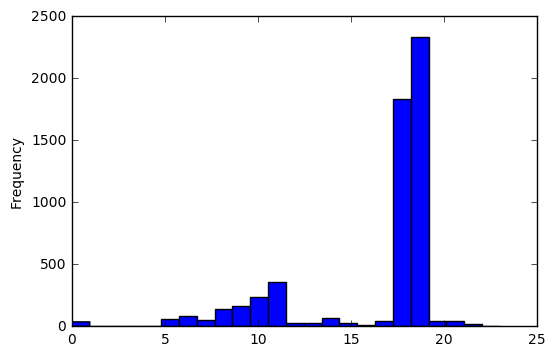

In [88]:
numday=[]                                  #Lista para guardar el mes y el año
for n in range(len(z['afecha'])):
    numday.append(datetime.weekday(z.iloc[n,25]))          #Asigna un número al día de la semana

z['Numday'] = numday 

horademax=z[lista_columnas].idxmax(axis=1)                        #Halla el precio máximo diario
z['horademax'] = horademax                      # Agrega una nueva columna donde está el maximo diario

zsinsabado = z[z.Numday != 5]                   #Elimina los valores correspondientes a los días sábado
zlaboral = zsinsabado[zsinsabado.Numday != 6]    ##Elimina los valores correspondientes a los días domingo

zlaboral['horademax'] = zlaboral['horademax'].astype('float') #Se cambió tipo de variable string por float

zlaboral['horademax'].plot(kind='hist', bins=24)


**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


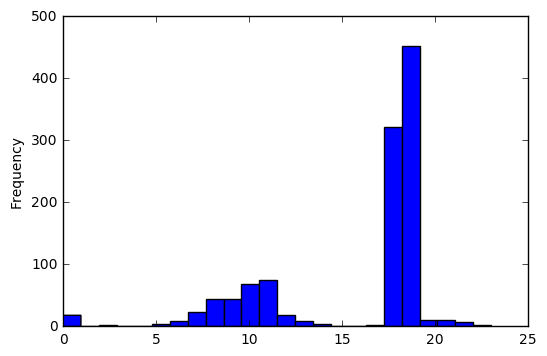

In [89]:
zsolosabado = z[z.Numday == 5]      #Agrupa la información de z, seleccionando los datos del sía sábado (Numday=5)

zsolosabado['horademax'] = zsolosabado['horademax'].astype('float') #Se cambió tipo de variable string por float

zsolosabado['horademax'].plot(kind='hist', bins=24)

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


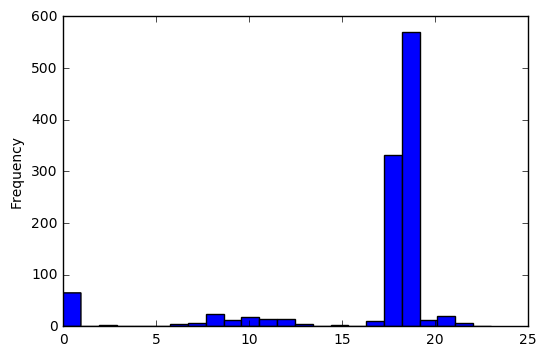

In [90]:
zsolodomingo = z[z.Numday == 6]       #Hace una lista, con los valores de sólo el domingo

zsolodomingo['horademax'] = zsolodomingo['horademax'].astype('float') #Se cambió tipo de variable string por float

zsolodomingo['horademax'].plot(kind='hist', bins=24)

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [91]:
anuales=[]                                      # Lista vacía

for n in range(len(z['afecha'])):
    anuales.append(str(z.iloc[n,25])[0:4])      # A la lista anuales, se le asignan los valores de año 
z['anual']=anuales                              # Lista para guardar año

idx = z.groupby('anual')['minimus'].idxmin() #Se hace la búsqueda del valor mínimo de cada año

print(z.loc[idx, ['minimus', 'afecha' , 'anual']]) #Imprimen resultados con el índice asociado


        minimus     afecha anual
6      0.000000 1995-07-26  1995
295    0.000000 1996-05-10  1996
738   10.882310 1997-07-15  1997
1097  13.847330 1998-07-09  1998
1381  18.359530 1999-03-28  1999
1753  21.531167 2000-03-25  2000
2266  24.822879 2001-08-20  2001
2509  26.777682 2002-04-20  2002
2809  37.013438 2003-02-14  2003
3218  32.252998 2004-03-29  2004
3772  27.581415 2005-10-04  2005
4150  26.714797 2006-10-17  2006
4348  30.173824 2007-05-03  2007
4751  29.199135 2008-05-26  2008
5326  32.892503 2009-12-22  2009
5545  32.024957 2010-07-12  2010
5874  33.291100 2011-06-06  2011
6206  34.988099 2012-04-29  2012
6462  40.415346 2013-01-09  2013
6831  38.941951 2014-01-11  2014
7193  46.791501 2015-01-06  2015
7896  61.100689 2016-12-09  2016
7922  61.356315 2017-01-04  2017


C:\Users\maryl\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

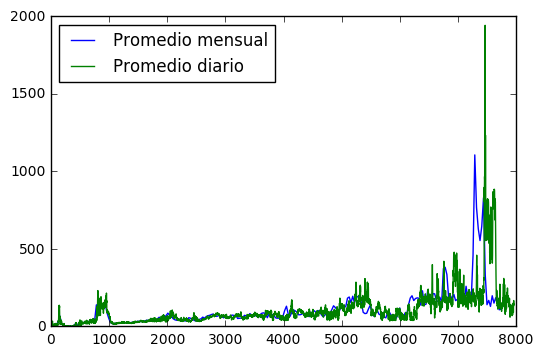

In [92]:
prommesgraf=[]
for i in range (len(prommes)):     #Genera una lista para graficar prommes, a lo largo del eje x y no como una lista corta.
    dato = i*30
    prommesgraf.append(dato)
    
plt.plot(prommesgraf, prommes)
plt.plot(promdia)
plt.legend(['Promedio mensual', 'Promedio diario'], loc='upper left')
plt.show()

---